# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to <u>predict cancer mortality rates</u> in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. <u>Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution</u>.

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will NOT be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. The provided Test data (I.e. 'Test_data_example.csv' and 'Test_data_example_targets.csv') is NOT to be used as an independent test set when developing your models, but only to prepare your 'prediction/inference' script to make predictions on completely unseen data. Part of this assessment requires you to write such an inference script that evaluates your best, trained regression model on the final test data set such that, we are able to run the inference script ourselves on the unseen (i.e. data we have not provided to you) test data. Yyou can use the example test data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to verify that it works prior to submission.

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
keys = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medianIncome', 'popEst2015', 
        'povertyPercent', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 
        'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24', 
        'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 
        'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 
        'PctPublicCoverage', 'PctPubliceCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 
        'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

root_dir = '/kaggle/input/' # this is to be defined by you 
local_path = 'regression/' # store the related data files in this folder

data_dir = root_dir + local_path
print(data_dir)
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

/kaggle/input/regression/


# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

# **Sample Answer to Exercise 1**

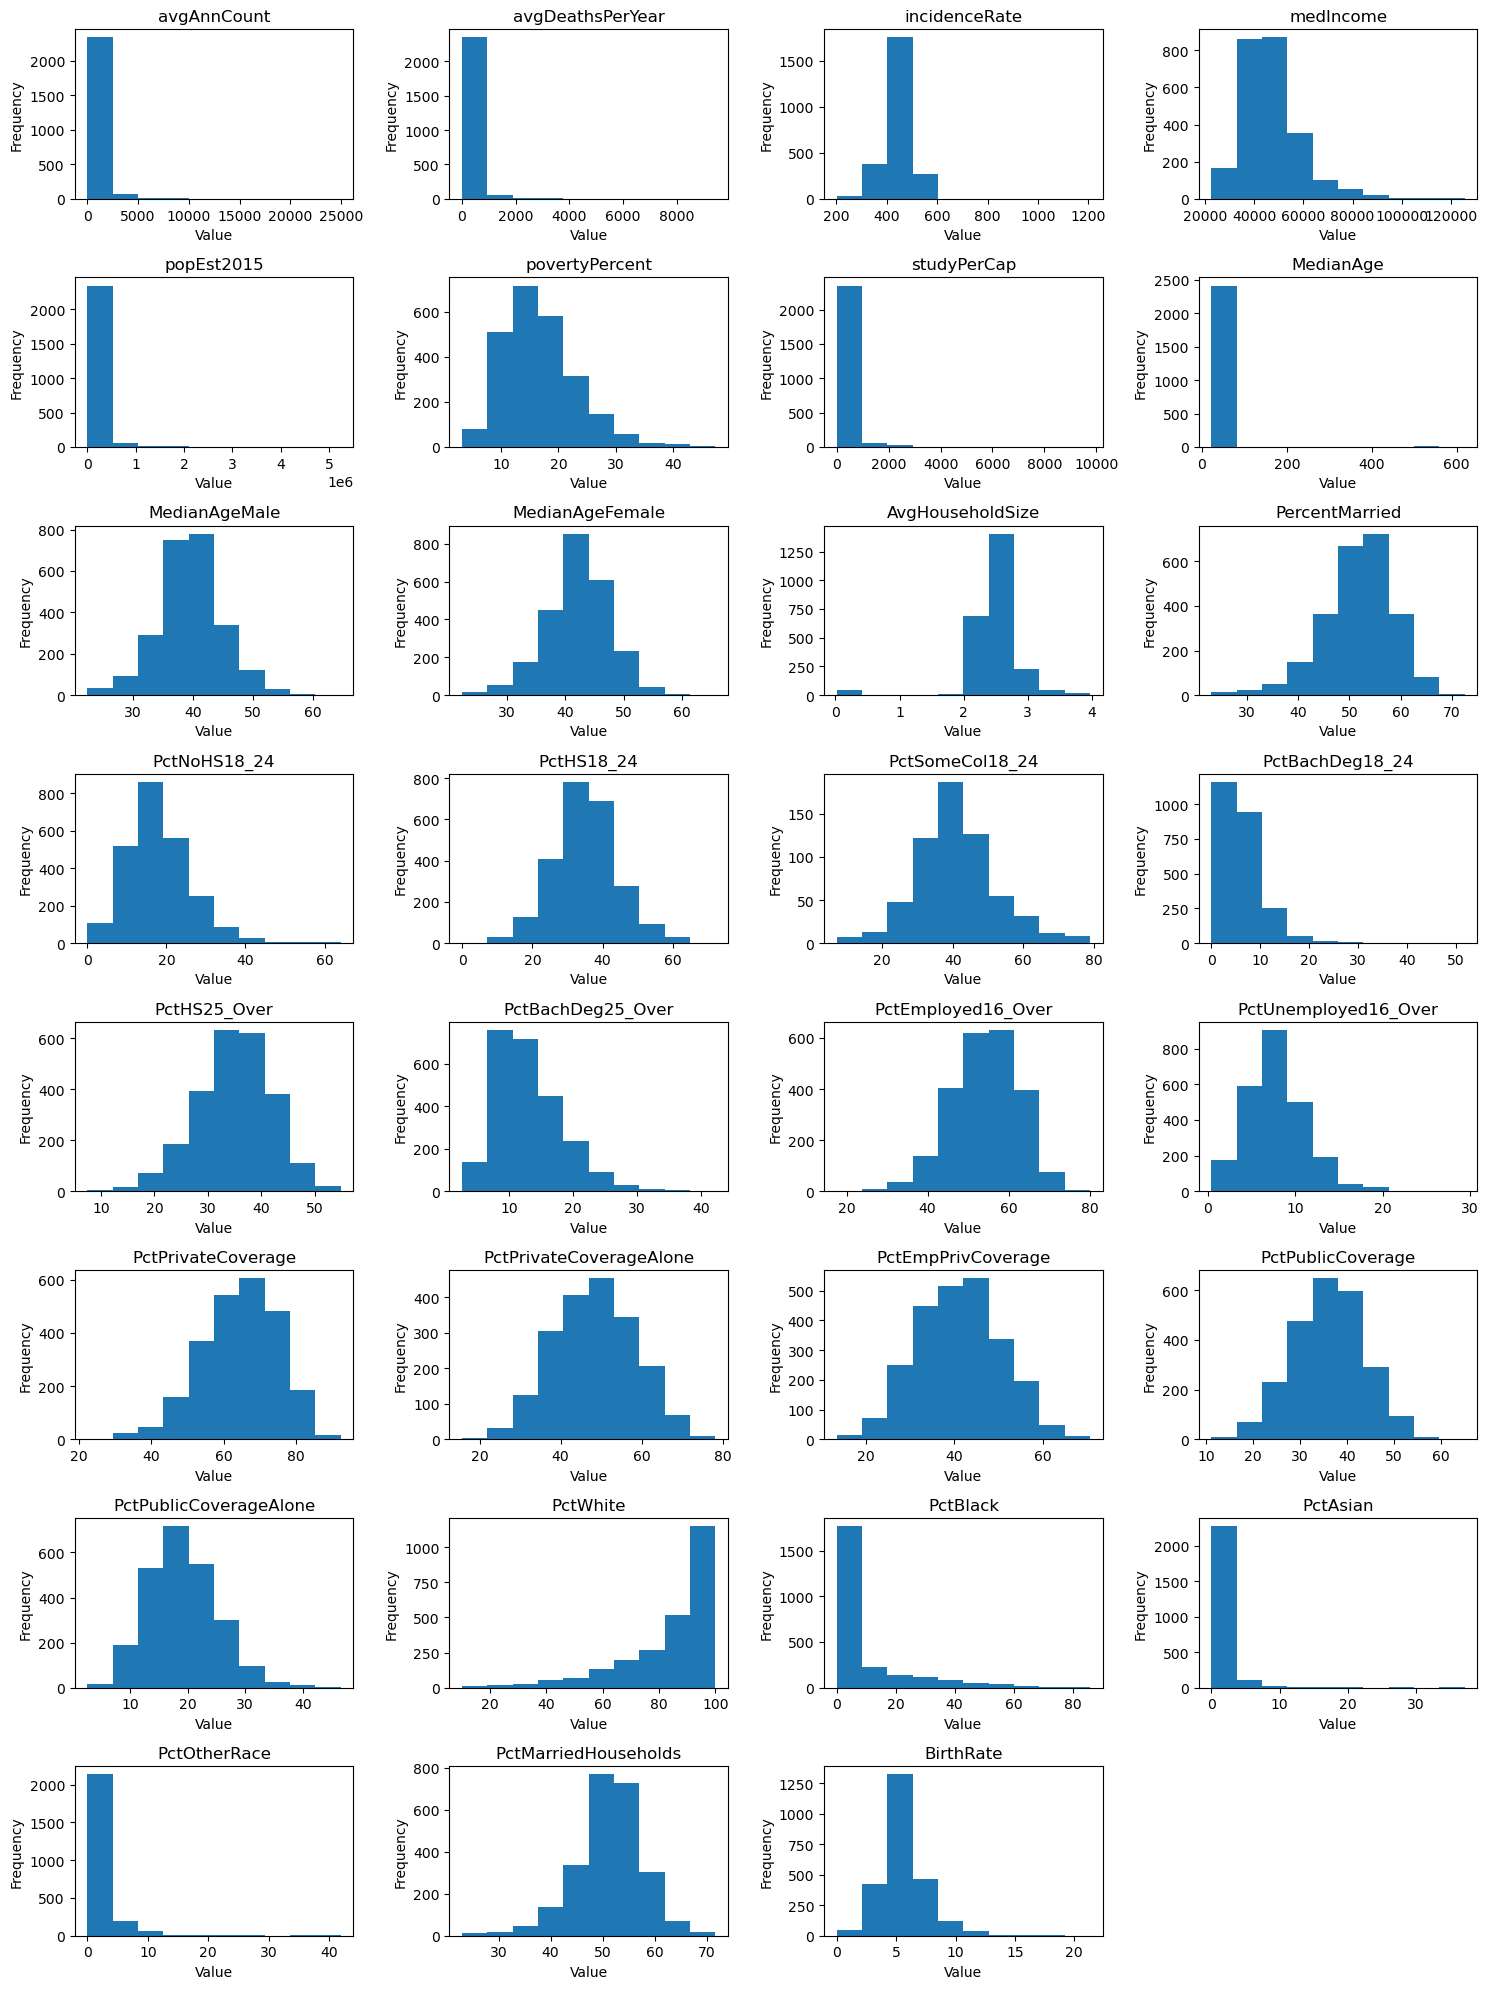

In [4]:
# Histograms of all features
df_training_data_path = pd.read_csv(training_data_path)
fig, axs = plt.subplots(8, 4, figsize=(15, 20))
axs = axs.flatten()

# Plot
for i, feature in enumerate(df_training_data_path.columns):
    axs[i].hist(df_training_data_path[feature])
    axs[i].set_title(feature)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
for i in range(len(df_training_data_path.columns), len(axs)):
    fig.delaxes(axs[i])
fig.tight_layout()

plt.show()


Based on the graphs generated above, this dataset appears to be of high quality.
Most features follow a normal distribution.

There are some unusual values in the dataset, with some clustering around the beginning and some unusually high values, which can be attributed to large counties with massive populations. However, there are also outliers in the "MedianAge", which is surprising because it seems strange for the median age of county residents to be over 100 or even up to 619.

In [5]:
# Correlations between targets and all other features
df_training_targets = pd.read_csv(training_targets_path)
df_training_data = df_training_data_path
df_all = pd.concat([df_training_data,df_training_targets],axis=1)

corr_matrix = df_all.corr()[['TARGET_deathRate']]
sorted_corr_df = pd.DataFrame({'correlation': corr_matrix.unstack(), 'abs_correlation': abs(corr_matrix.unstack())})
sorted_corr_df = sorted_corr_df.reset_index().sort_values('abs_correlation', ascending=False).set_index(['level_0', 'level_1'])
sorted_corr_df[1:]

correlation  abs_correlation
level_0          level_1                                              
TARGET_deathRate PctBachDeg25_Over          -0.491411         0.491411
                 incidenceRate               0.443983         0.443983
                 PctPublicCoverageAlone      0.439734         0.439734
                 medIncome                  -0.416607         0.416607
                 povertyPercent              0.413260         0.413260
                 PctHS25_Over                0.409915         0.409915
                 PctEmployed16_Over         -0.400317         0.400317
                 PctPublicCoverage           0.391899         0.391899
                 PctPrivateCoverage         -0.382786         0.382786
                 PctUnemployed16_Over        0.362612         0.362612
                 PctPrivateCoverageAlone    -0.355050         0.355050
                 PctMarriedHouseholds       -0.290645         0.290645
                 PctBachDeg18_24            -0.284566         0.284566
                 PctHS18_24                  0.266285         0.266285
                 PercentMarried             -0.266153         0.266153
                 PctEmpPrivCoverage         -0.259006         0.259006
                 PctBlack                    0.236380         0.236380
                 PctSomeCol18_24            -0.186140         0.186140
                 PctOtherRace               -0.182602         0.182602
                 PctAsian                   -0.181948         0.181948
                 PctWhite                   -0.174521         0.174521
                 avgAnnCount                -0.150019         0.150019
                 popEst2015                 -0.130122         0.130122
                 avgDeathsPerYear           -0.094048         0.094048
                 PctNoHS18_24                0.090565         0.090565
                 BirthRate                  -0.088543         0.088543
                 AvgHouseholdSize           -0.045545         0.045545
                 MedianAgeMale              -0.027263         0.027263
                 studyPerCap                -0.024729         0.024729
                 MedianAgeFemale             0.008665         0.008665
                 MedianAge                  -0.000039         0.000039

The top five features with strongest correlations to the targets are (absolute value used here):

PctBachDeg25_Over; incidenceRate; PctPublicCoverageAlone; medIncome; povertyPercent.

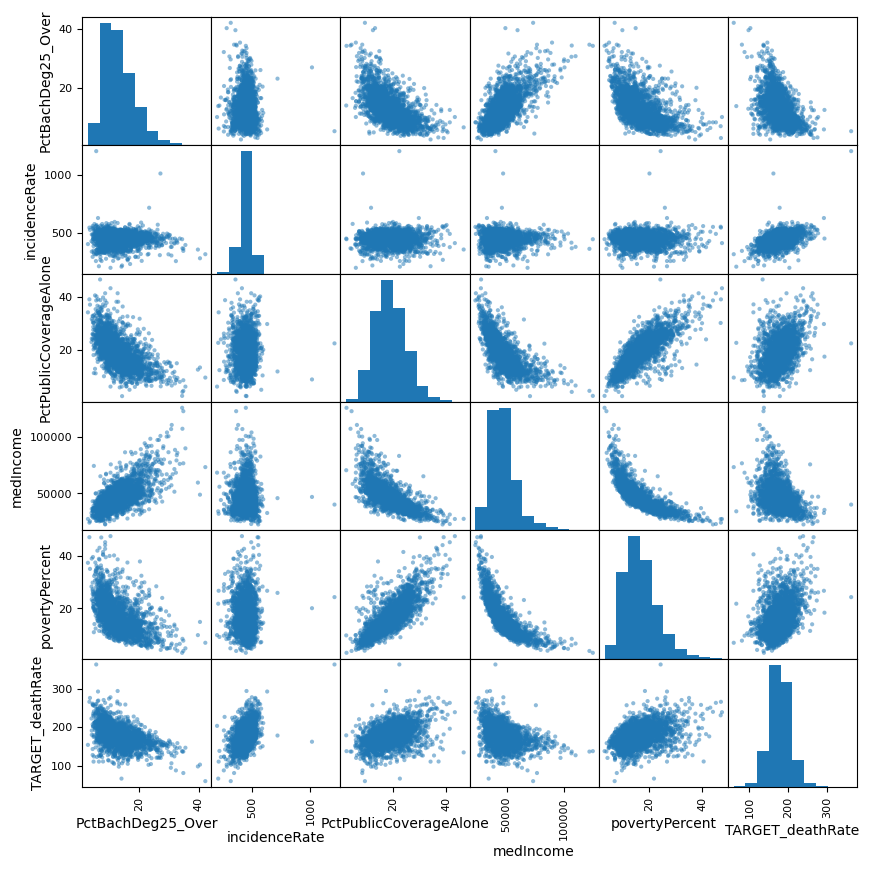

In [6]:
# Target Features: PctBachDeg25_Over; incidenceRate; PctPublicCoverageAlone; medIncome; povertyPercent.
Target_Features = ['PctBachDeg25_Over', 'incidenceRate', 'PctPublicCoverageAlone', 'medIncome', 'povertyPercent', 'TARGET_deathRate']
corr_matrix = df_all.corr()[['TARGET_deathRate']].loc[Target_Features]

pd.plotting.scatter_matrix(df_all[corr_matrix.index], figsize=(10, 10), diagonal='hist', marker='.', alpha=0.5, range_padding=0.1)
plt.show()

As shown above, there is a clear positive correlation between PovertyPercent, which represents the percent of the populace in poverty, and PctPublicCoverageAlone, which represents the percent of county residents with private health coverage alone (no public assistance). This means that as PctPublicCoverageAlone increases, so does PovertyPercent.

Additionally, there is a negative correlation between PovertyPercent and medIncome, which is obvious intuitively and clearly evident from the graphs. 

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

# **Sample Answer to Exercise 2**

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df_training_data = pd.read_csv(training_data_path)
df_training_data
# The values here are all numerical figures, so there is no need to apply one-hot encoding
# df_training_data_path.info()
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

df_training_data_pre = pipeline.fit_transform(df_training_data)
df_training_data_pre = pd.DataFrame(df_training_data_pre, columns = df_training_data.columns)
df_training_data_pre.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,-0.418600,-0.336843,-0.792910,-1.106563,-0.321391,0.576024,-0.29103,0.121701,2.122302,1.822380,...,0.016283,-1.609446,1.751848,0.235270,0.795452,-0.596862,-0.449266,-0.487014,0.097040,-0.298950
1,-0.375912,-0.312739,-0.802008,0.024206,-0.271554,-0.479177,-0.29103,-0.103374,0.038539,0.100185,...,0.898725,0.593965,-0.600865,-1.033286,0.528141,-0.481019,-0.245376,-0.316471,-0.052515,0.348572
2,-0.438780,-0.378479,-1.744511,2.546139,-0.315708,-1.581626,-0.29103,-0.161250,-0.510816,-0.442680,...,1.892868,1.388463,-2.342652,-1.767712,0.734930,-0.627355,-0.278579,-0.530235,2.027370,-0.245321
3,-0.267252,-0.183451,-0.332575,2.835673,-0.181191,-1.471381,-0.29103,-0.045498,0.587895,0.362259,...,1.758826,1.526177,-0.964820,-0.949828,0.364385,-0.111874,-0.144458,-0.436916,1.692375,-0.004386
4,-0.406182,-0.332461,-0.734686,-0.357897,-0.273096,-0.353183,-0.29103,-0.311300,-1.780017,-1.977680,...,0.250856,0.562185,-1.224788,-0.182018,-0.245879,-0.422155,2.802006,1.020883,1.793664,2.412845


# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


# **Sample Answer to Exercise 3**

In [10]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

Y = pd.read_csv(training_targets_path)
X = df_training_data_pre

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# OLS
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
print("OLS Coefficients: ", ols_model.coef_)
print("OLS Intercept: ", ols_model.intercept_)

OLS Coefficients:  [[-5.02997695  9.29770647 10.37410083  0.91685837 -5.0439529   1.12197027
   0.26461565 -0.17705808 -3.36995999  0.30094204  0.02689894  7.54778426
  -0.97027177  1.95292976  0.08378062  0.1274128   2.1672577  -7.88345107
  -3.66042447 -0.01346237 -6.06364634  0.78167314  2.65864981 -2.68890298
   2.76851489 -2.7909556  -2.25076236  0.18287633 -3.59830486 -7.58920419
  -2.12503687]]
OLS Intercept:  [178.59218869]


In [13]:
#  Lasso and Ridge
lasso_model = Lasso()
ridge_model = Ridge()

alphas = np.logspace(-5, 2, 100)
param_grid = {'alpha': alphas}

# Cross-validated grid search
lasso_grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search.fit(X_train, y_train)

ridge_grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid_search.fit(X_train, y_train)

# lasso_grid_search.best_score_
# ridge_grid_search.best_score_

# Get the best weights
best_lasso_alpha = lasso_grid_search.best_params_['alpha']
best_ridge_alpha = ridge_grid_search.best_params_['alpha']

print("best_lasso_alpha: ",best_lasso_alpha)
print("best_ridge_alpha: ",best_ridge_alpha)

lasso_best = Lasso(alpha=best_lasso_alpha)
lasso_best.fit(X_train, y_train)

ridge_best = Ridge(alpha=best_ridge_alpha)
ridge_best.fit(X_train, y_train)

best_lasso_alpha:  0.06579332246575675
best_ridge_alpha:  31.992671377973846


Ridge(alpha=31.992671377973846)

First of all, Both Lasso and Ridge regression are techniques used to prevent overfitting in OLS by adding a regularization term to the cost function.\
Lasso adds a term **the sum of the squares of the weights** to the end of the original cost function, while Ridge adds a term **the sum of the absolute values of the weights**. 

The regularization term is multiplied by the hyperparameter alpha, where a higher value of alpha leads to more regularization and a lower value leads to less regularization. When alpha is set to 0, both Lasso and Ridge regression become equivalent to OLS regression.

To find the optimal value of alpha, a grid search be performed by testing 100 values spaced evenly on a logarithmic scale between 10^-5 and 10^2. The models are then scored using the negative mean squared error method with 5-fold cross-validation to find the best alpha value.

In [29]:
# Evaluation
ols_pred = ols_model.predict(X_test)
lasso_pred = lasso_best.predict(X_test)
ridge_pred = ridge_best.predict(X_test)

ols_mse = mean_squared_error(y_test, ols_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("OLS MSE: ", ols_mse)
print("Lasso MSE: ", lasso_mse)
print("Ridge MSE: ", ridge_mse)

OLS MSE:  349.8020888889968
Lasso MSE:  351.2378497065605
Ridge MSE:  350.86470446424113


#### As shown above: Model OLS has the best performance with the lowest MSE value.

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [31]:
feature = df_training_data_pre.columns
lasso_coefficients = lasso_best.coef_
feature_importance = pd.Series(lasso_coefficients, index=feature)
top_5_features = feature_importance.abs().sort_values(ascending=False).head(5)

print("Five most important/relevant features for Lasso:")
print(top_5_features)

Five most important/relevant features for Lasso:
incidenceRate           10.424742
PctBachDeg25_Over        7.480398
PctPrivateCoverage       6.138613
PctMarriedHouseholds     5.982673
avgDeathsPerYear         5.785954
dtype: float64


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (12 marks)

# **Sample Answers for Exercise 5**

In [34]:
from sklearn.ensemble import RandomForestRegressor

# 100 trees will be generated
# the max number of features will be chosen is 10
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_features=10)
rf_model.fit(X_train, np.ravel(y_train))

rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

print("Random Forest MSE: ", rf_mse)
print("Best performing model: OLS with MSE:", ols_mse)

Random Forest MSE:  374.9782105081966
Best performing model: OLS with MSE: 349.8020888889968


In [35]:
# 5 most important features with RF
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=feature)
sorted_rf_feature_importance = rf_feature_importance.sort_values(ascending=False)

top_5_rf_features = sorted_rf_feature_importance.head(5)

In [36]:
# Compare the top 5 features identified by the Lasso and RF
print("Top 5 most important features (Lasso):")
print(top_5_features)
print("\nTop 5 most important features (Random Forest):")
print(top_5_rf_features)

Top 5 most important features (Lasso):
incidenceRate           10.424742
PctBachDeg25_Over        7.480398
PctPrivateCoverage       6.138613
PctMarriedHouseholds     5.982673
avgDeathsPerYear         5.785954
dtype: float64

Top 5 most important features (Random Forest):
incidenceRate             0.152580
PctBachDeg25_Over         0.113670
medIncome                 0.060035
PctPublicCoverageAlone    0.057740
PctHS25_Over              0.052800
dtype: float64


Both Lasso and Random Forest models agree on the importance of incidenceRate, PctBachDeg25_Over, and avgDeathsPerYear.

Lasso highlights PctPrivateCoverage and PctMarriedHouseholds, while Random Forest emphasizes medIncome and PctHS25_Over. 

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

# **Sample Answers for Exercise 6**

*   Retrain the best regression model identified with best set of associated hyperparameters on the provided training set (1 mark)
*   Write inference script to accept unseen test data as input similar to the provided example test data, predict targets, and evaluate predictions quantitatively using suitable metrics (2 marks)



In [108]:
# Retrain the best regression model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Retrain will the whole dataset
train_data_path = '/kaggle/input/regression/Training_data.csv'
train_targets_path = '/kaggle/input/regression/Training_data_targets.csv'

df_training_data = pd.read_csv(train_data_path)
df_train_targets = pd.read_csv(train_targets_path)

# The values here are all numerical figures, so there is no need to apply one-hot encoding
# df_training_data_path.info()
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

df_training_data_pre = pipeline.fit_transform(df_training_data)
df_training_data_pre = pd.DataFrame(df_training_data_pre, columns = df_training_data.columns)
df_training_data_pre.head(5)

# My best model is OLS thus no hyperparameters
ols_model = LinearRegression()
ols_model.fit(df_training_data_pre, df_train_targets)

LinearRegression()

In [109]:
# Inference script to accept unseen test data
test_data_path = '/kaggle/input/regression/Test_data_example.csv'
test_targets_path = '/kaggle/input/regression/Test_data_example_targets.csv'

df_test_data = pd.read_csv(test_data_path)
df_test_targets = pd.read_csv(test_targets_path)

df_test_data_pre = pipeline.fit_transform(df_test_data)
df_test_data_pre = pd.DataFrame(df_test_data_pre, columns = df_test_data.columns)

test_pred_ols = ols_model.predict(df_test_data_pre)

# Calculate MSE
mse = mean_squared_error(df_test_targets, test_pred_ols)
print("MSE for best regression model OLS: ", mse)

MSE for best regression model OLS:  508.1270007671188


# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

# **Exercise 7**

Read in the provided data set for classification of patients at risk of mortality 1-yr post heart attack. Plot histograms of all features to visualise their distributions and identify outliers. Report identified outliters and take steps to deal with outliers (if any) appropriately (3 marks)

In [59]:
data_features_path = "/kaggle/input/classification/Heart-attack-data-predictors.csv"
data_targets_path = "/kaggle/input/classification/Heart-attack-data-targets.csv"
df_features = pd.read_csv(data_features_path)
df_targets = pd.read_csv(data_targets_path)
df_targets = np.ravel(df_targets)
df_features.head(5)

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,71.0,0,0.260,9.000,4.600,1.00
1,72.0,0,0.380,6.000,4.100,1.70
2,55.0,0,0.260,4.000,3.420,1.00
3,60.0,0,0.253,12.062,4.603,1.45
4,57.0,0,0.160,22.000,5.750,2.25


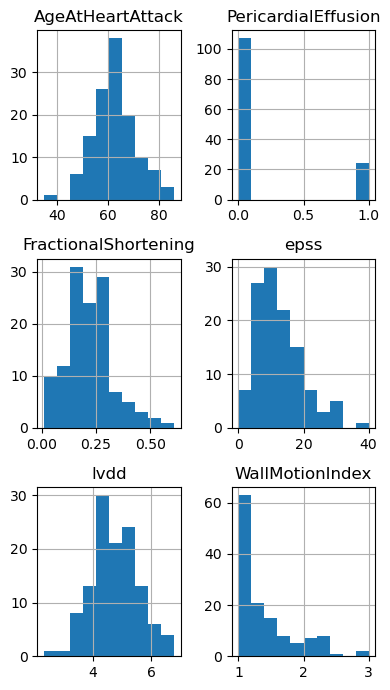

In [60]:
df_features.hist(figsize=(4, 7))
plt.tight_layout()

As shown above, there are no strange outliers, so there is no need to perform any operations

# **Exercise 8**

Create a machine learning pipeline using scikit-learn and pre-process the provided data appropriately (3 marks)

In [62]:
# df_features, df_targets
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

df_features_pre = pipeline.fit_transform(df_features)
df_features_pre = pd.DataFrame(df_features_pre, columns = df_features.columns)
df_features_pre.head(20)

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,1.008222,-0.473602,0.421192,-0.437785,-0.199163,-0.839848
1,1.130917,-0.473602,1.572694,-0.869769,-0.843625,0.720531
2,-0.954890,-0.473602,0.421192,-1.157758,-1.720093,-0.839848
3,-0.341418,-0.473602,0.354021,0.003126,-0.195296,0.163253
4,-0.709501,-0.473602,-0.538393,1.434144,1.283099,1.946542
5,0.640139,-0.473602,0.421192,-1.013763,-0.572951,-0.839848
6,-0.096029,-0.473602,0.133316,2.730094,0.870643,1.110625
7,-0.341418,-0.473602,1.092901,-0.581780,0.638637,-0.839848
8,-2.059141,-0.473602,1.188860,-1.733736,0.432409,-0.527772
9,-1.077585,-0.473602,-0.730310,0.138193,-0.340945,-0.416316


# **Exercise 9**

Train logistic regression classifiers, with and without L1 and L2 regularisation, using the provided data and compare and evaluate their performance. Report the best performing classifier, with supporting evidence/justification for why it was identified as the best performing classifier. (14 marks)

In [74]:
# df_features_pre,df_targets
X_train, X_test, y_train, y_test = train_test_split(df_features_pre, df_targets, test_size=0.2, random_state=42)
# Train logistic regression classifiers, with and without L1 and L2 regularisation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# No regularization
logreg_no_reg = LogisticRegression(penalty='none', solver='lbfgs', max_iter=1000)
logreg_no_reg.fit(X_train, y_train)
y_pred_no_reg = logreg_no_reg.predict(X_test)
accuracy_no_reg = accuracy_score(y_test, y_pred_no_reg)

# L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logreg_l1.fit(X_train, y_train)
y_pred_l1 = logreg_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)

# L2 regularization
logreg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
logreg_l2.fit(X_train, y_train)
y_pred_l2 = logreg_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

No regularization classification report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.43      0.43      0.43         7

    accuracy                           0.70        27
   macro avg       0.61      0.61      0.61        27
weighted avg       0.70      0.70      0.70        27


L1 regularization classification report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.50      0.57      0.53         7

    accuracy                           0.74        27
   macro avg       0.67      0.69      0.68        27
weighted avg       0.75      0.74      0.75        27


L2 regularization classification report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.43      0.43      0.43         7

    accuracy                           0.70        27
   

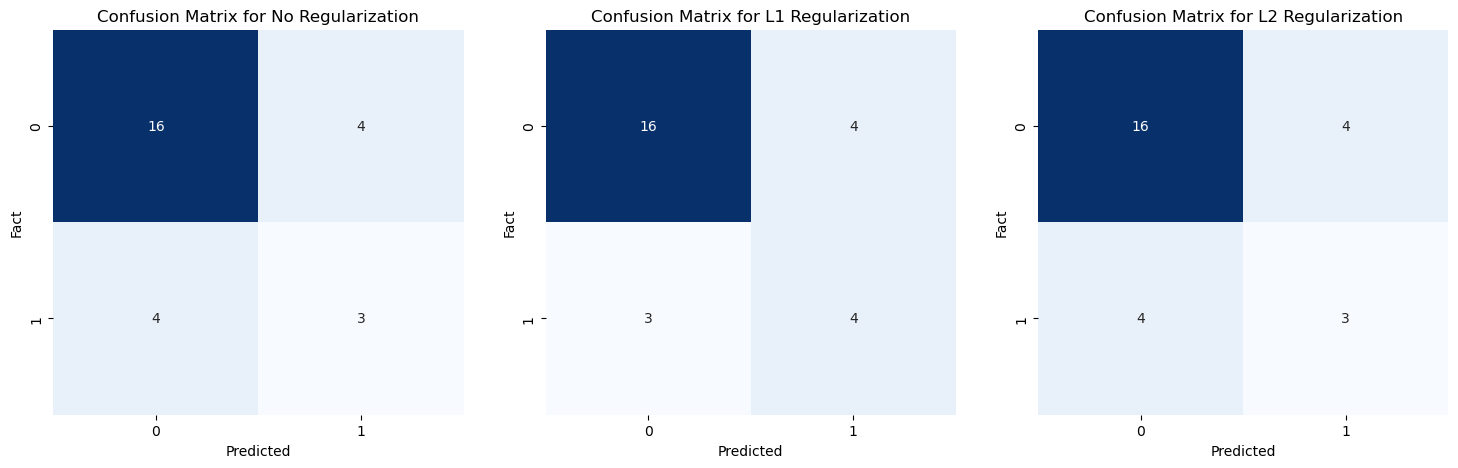

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate reprot for each model
print("No regularization classification report:")
print(classification_report(y_test, y_pred_no_reg))

print("\nL1 regularization classification report:")
print(classification_report(y_test, y_pred_l1))

print("\nL2 regularization classification report:")
print(classification_report(y_test, y_pred_l2))

def plot_confusion_matrix_subplot(ax, y_true, y_pred, model_name, labels):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Fact')
    ax.set_title(f'Confusion Matrix for {model_name}')

class_labels = ['0', '1'] 

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Generate confusion matrices for each model
plot_confusion_matrix_subplot(axes[0], y_test, y_pred_no_reg, 'No Regularization', class_labels)
plot_confusion_matrix_subplot(axes[1], y_test, y_pred_l1, 'L1 Regularization', class_labels)
plot_confusion_matrix_subplot(axes[2], y_test, y_pred_l2, 'L2 Regularization', class_labels)

plt.show()


Honestly, all three models performed poorly. In the medical field, we cannot solely consider the performance on "0" values, which represent people who are not ill. We need to focus more on the "1" values, which represent people who are ill. Therefore, we need to pay attention to the precision and recall for "1". 

Based on this, the L1 regularization classification model performed better than the others. It predicted more true positives, which means it detected more patients.

# **Exercise 10**

Train a Random Forest classifier using the provided data and quantitatively evaluate and compare the Random Forest classifier  with the best logistic regression classifier identified from Exercise 9. Report which model provides the best results. Next, report the top five most important/relevant features identified using the Random Forest model. (10 marks)

In [104]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

In [105]:
# evaluation
print("L1 regularization classification report:")
print(classification_report(y_test, y_pred_l1))

print("\nRF regularization classification report:")
print(classification_report(y_test, y_pred_rf))

L1 regularization classification report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.50      0.57      0.53         7

    accuracy                           0.74        27
   macro avg       0.67      0.69      0.68        27
weighted avg       0.75      0.74      0.75        27


RF regularization classification report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.40      0.29      0.33         7

    accuracy                           0.70        27
   macro avg       0.59      0.57      0.57        27
weighted avg       0.68      0.70      0.69        27



Still L1 get better results.

In [103]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

importances_df = pd.DataFrame({'Feature': df_features_pre.columns, 'Importance': feature_importances})
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)
print("Top 5 most important features:")
print(importances_df_sorted.head(5))

Top 5 most important features:
                Feature  Importance
5       WallMotionIndex    0.224306
3                  epss    0.216426
4                  lvdd    0.194804
2  FractionalShortening    0.165326
0      AgeAtHeartAttack    0.160711
